# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

from time import perf_counter

## **Loading the data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer_Personality_Segmentation.csv to Customer_Personality_Segmentation (2).csv


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("Customer_Personality_Segmentation.csv", sep="\t")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster,Age,Children,TotalSpend,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2,68,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3,71,2,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,60,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3,41,1,53,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3,44,1,422,14


##### **Observations:**
- There are 2240 observations and 29 columns in the dataset.

- Most columns have 2,240 non-null values; only Income has 2,216 non-null values (24 missing).

- Almost all columns are numeric (25 int, 1 float).

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [ ]:
avg_income = data["Income"].mean()
print("Average Household Income:", round(avg_income, 2))

Average Household Income: 52247.25


##### **Observations:**

- On average, customers have household income of approximatly $52.2k, make 12–13 total purchases in 2 years, visit the site 5.3 times/month, and recency 49 days.

- Spread is pretty big for income and spend

- Average spend (2 yrs): Wines 304, meat 167, fish 38, fruits 26, sweets 27, gold 44.

- Campaign responses are low overall.

- Income has 24 missing rows

- Extreme high outliers (max $666,666).


**Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
#1. check missing values
print("Missing values per column:")
print(data.isnull().sum())

#2. treat missing values
if "income" in data.columns and data["Income"].isna().sum() > 0:
    data["Income"] = data["Income"].fillna(data["Income"].median())

#3. to verfiy
print()
print("After treatment (missing values per column):")
print(data.isnull().sum())

Missing values per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Cluster                 0
Age                     0
Children                0
TotalSpend              0
TotalPurchases          0
dtype: int64

After treatment (missing values per column):
ID                      0
Year

##### **Observations:**
- Only the Income column had missing values (24 rows is approximatly 1%).

- These were filled with the median income to avoid distortion from extreme outliers.

- After treatment, the dataset has no missing values remaining.

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


##### **Observations:**
- The dataset was checked for duplicates.

- No duplicate rows were found (if your output shows 0).


## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

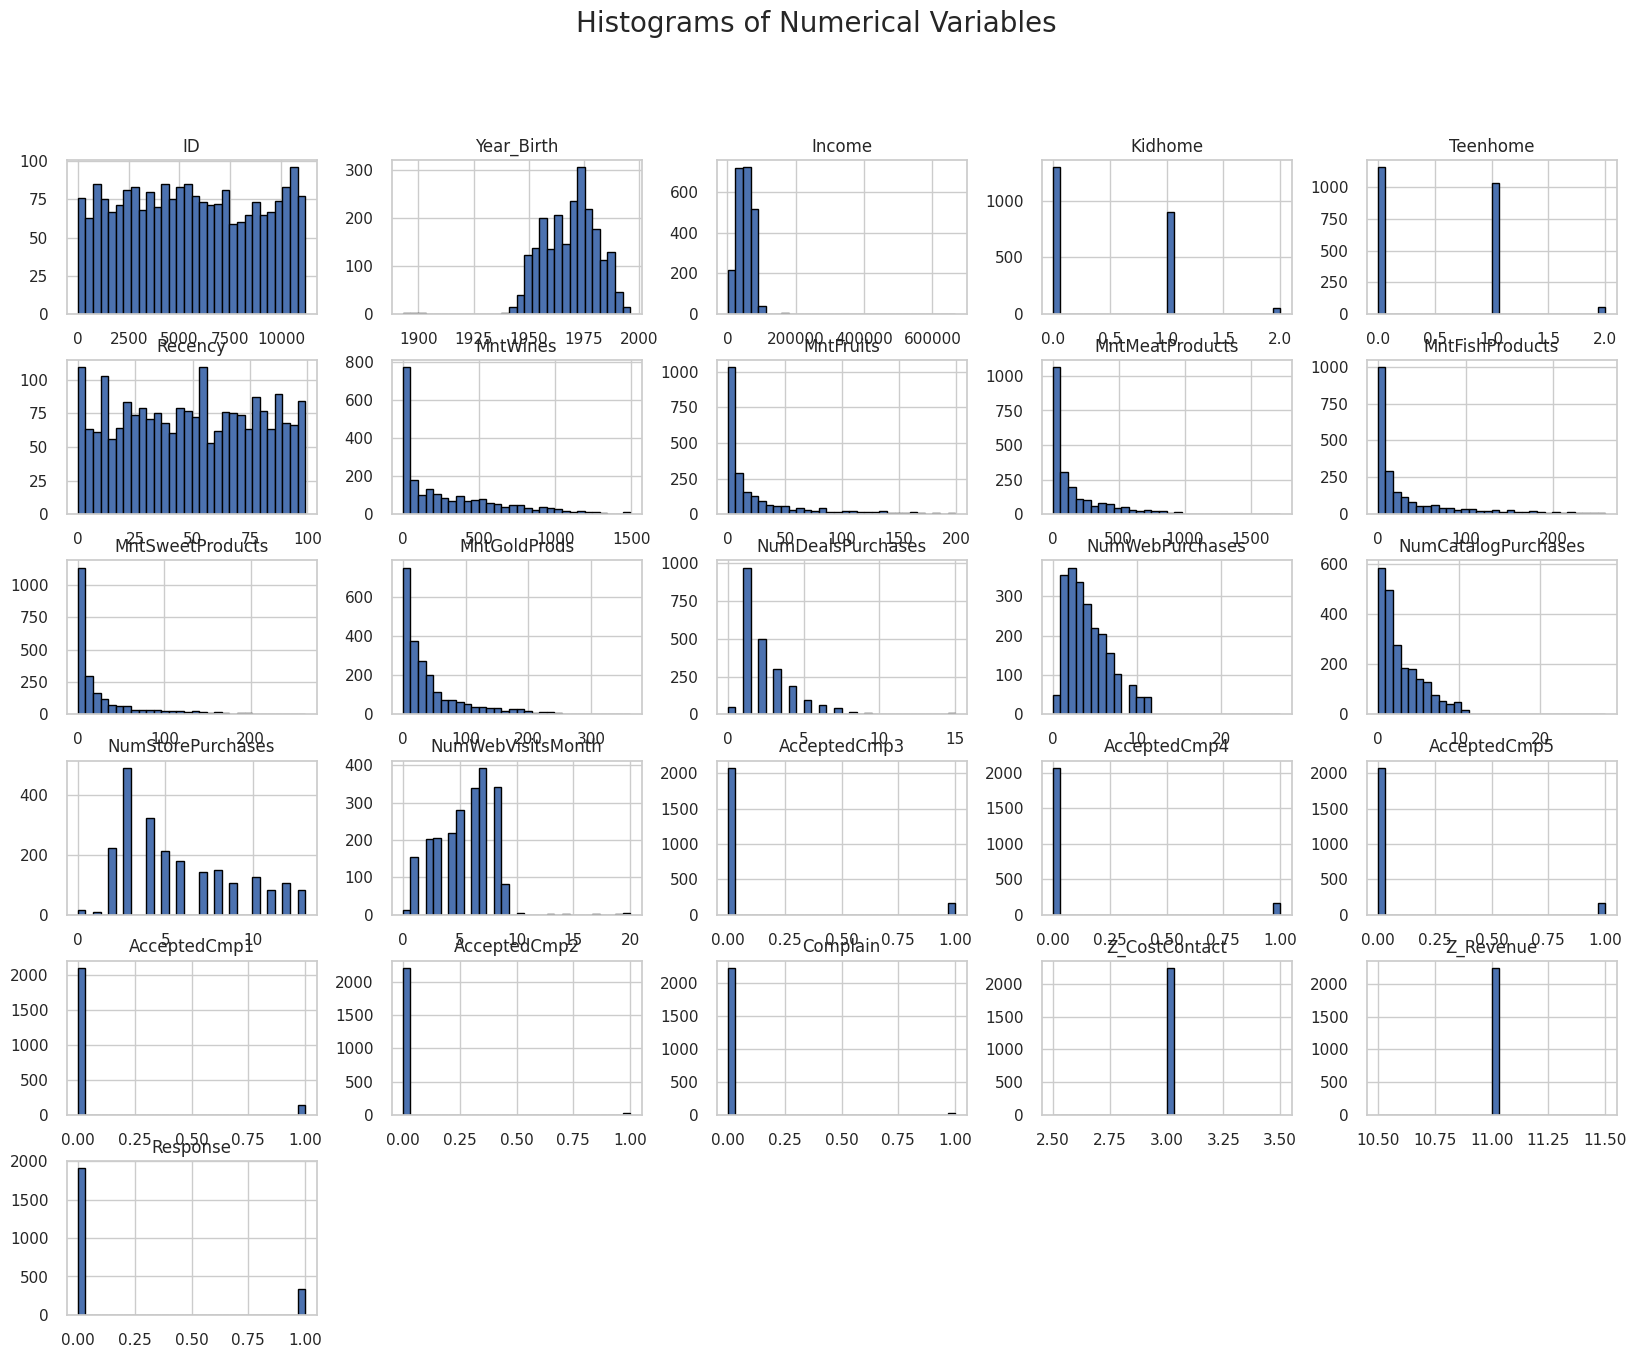

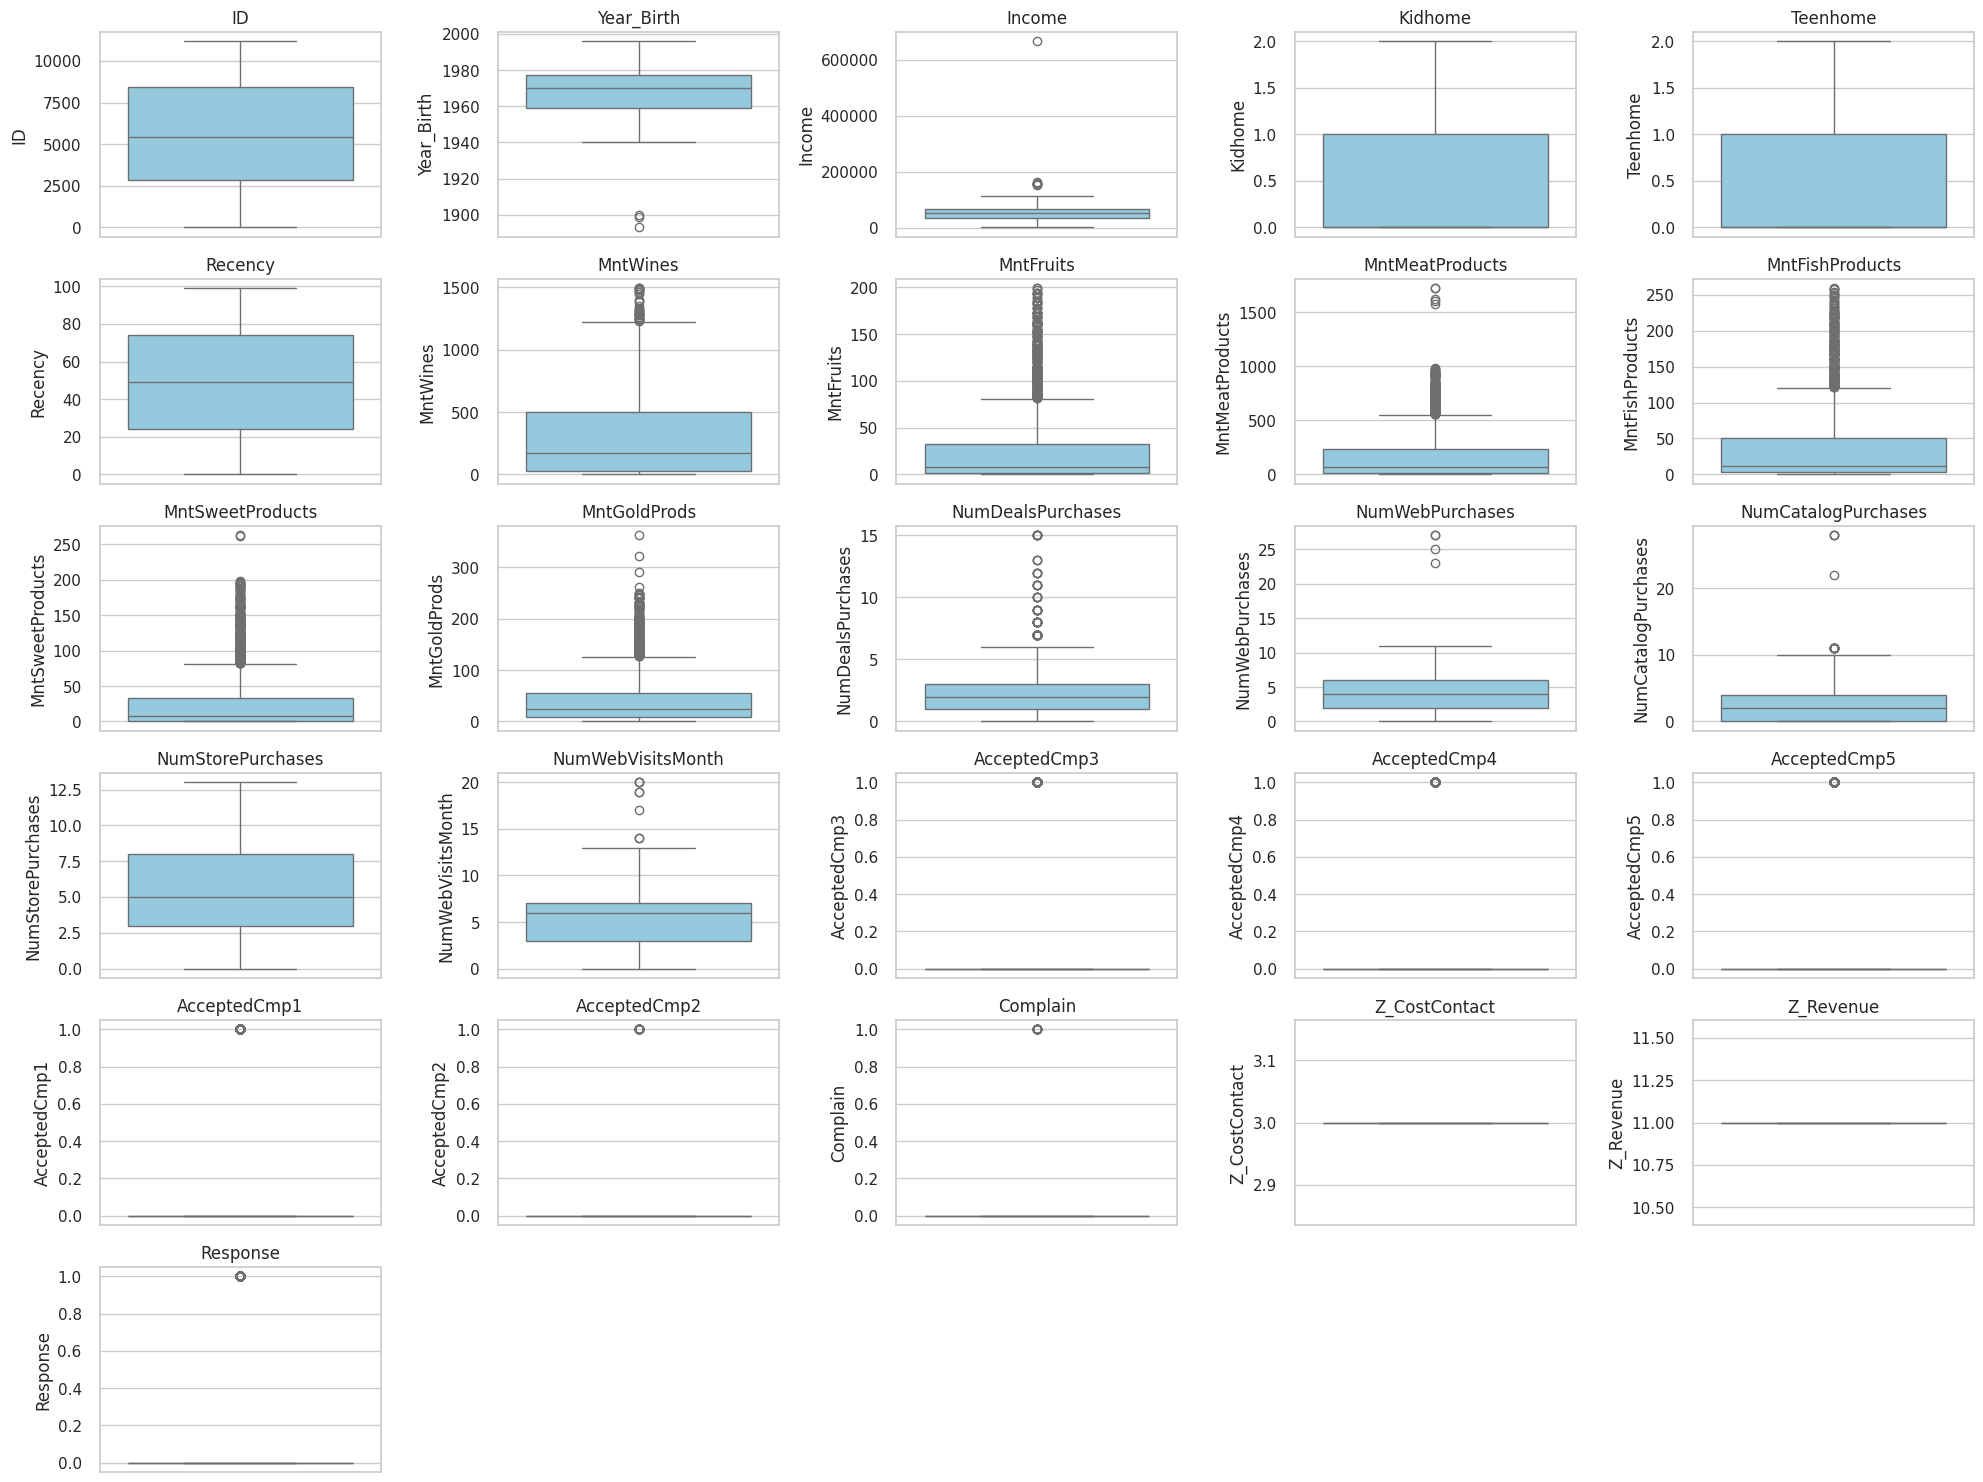

In [ ]:
#1. Histograms for the numerical variables
num_cols = data.select_dtypes(include=['int64','float64']).columns

data[num_cols].hist(figsize=(20, 15), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=20)
plt.show()

#2. Boxplots to check for any outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 5, i)  # adjust grid based on number of vars
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


##### **Observations:**
- Income averages around 50k but has extreme outliers.

- Year_Birth includes unrealistic old ages (outliers).

- Spending variables are skewed, most spend little, a few spend heavily.

- Store purchases are higher than online/catalog purchases.

- Campaign responses are mostly 0 (very low participation).

- Z_CostContact and Z_Revenue are constants.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

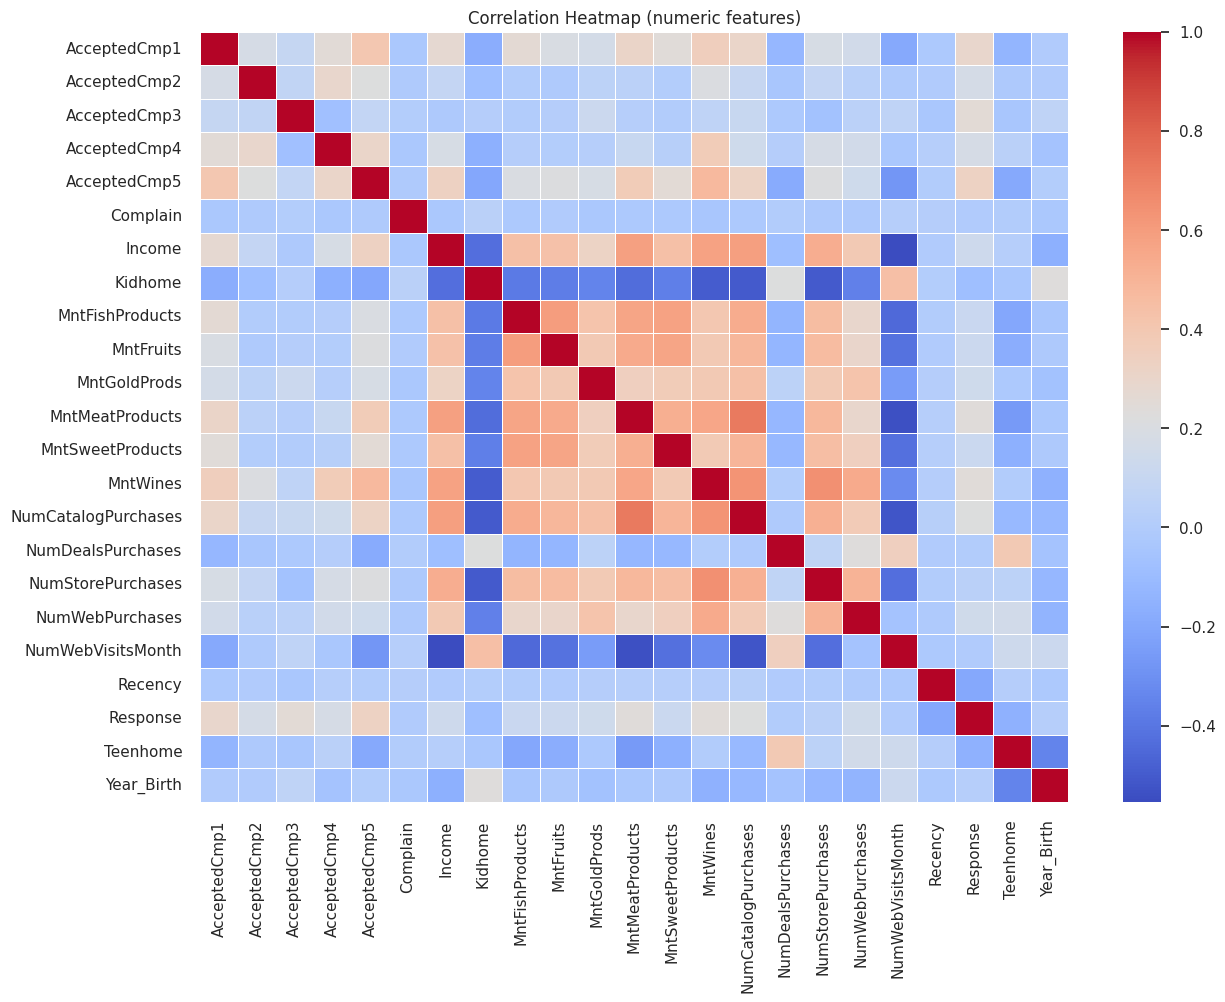

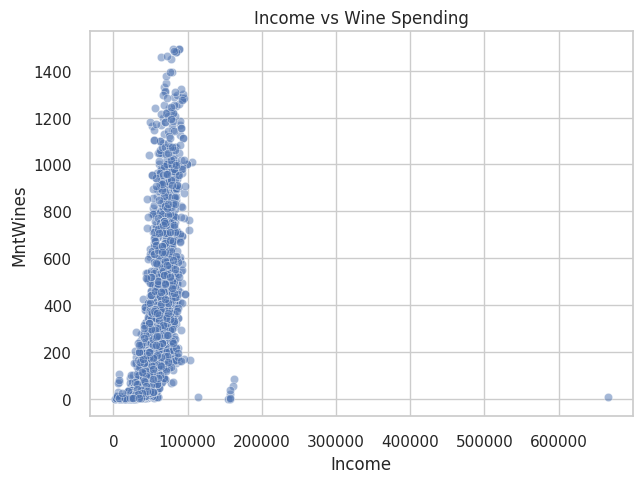

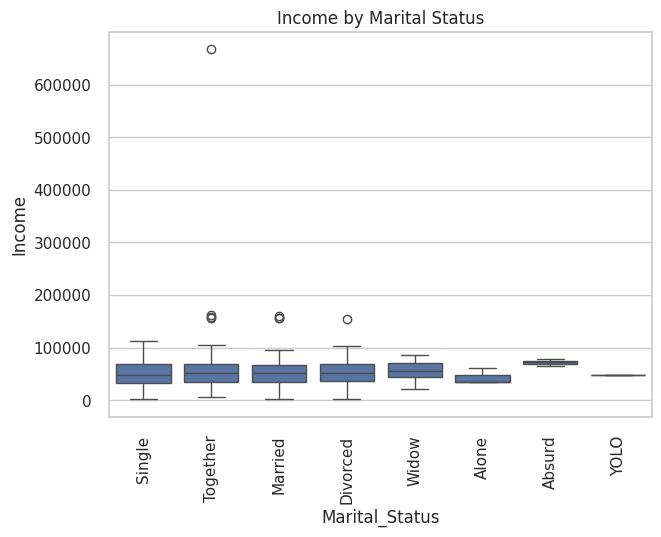

In [ ]:
#1. Parse date (helps later)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True, errors="coerce")

#2. Choose numeric columns and drop non-informative ones
num_cols = (
    data.select_dtypes(include=["int64","float64"]).columns
    .difference(["ID", "Z_CostContact", "Z_Revenue"]))

#3. Correlation heatmap
plt.figure(figsize=(14,10))
corr = data[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.4)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

#4. Relationship examples
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="Income", y="MntWines", alpha=0.5)
plt.title("Income vs Wine Spending")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=data, x="Marital_Status", y="Income")
plt.title("Income by Marital Status")
plt.xticks(rotation=90)
plt.show()



##### **Observations:**
- Strong positive correlations exist among spending variables, customers spending in one category tend to spend across others.

- Income is positively associated with higher spending (especially wine/meat).

- Recency shows weak correlation with spending

- Marital status shows some income variation (married/together slightly higher), but outliers distort the scale.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

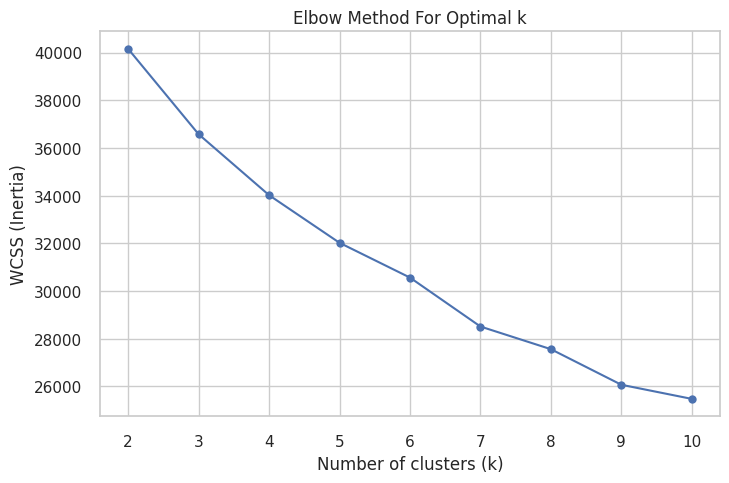

In [ ]:
# Q7: Elbow method (NaN-safe, self-contained)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 1) Build numeric feature matrix and drop non-features/labels/constants
drop_cols = ["ID","Dt_Customer","Z_CostContact","Z_Revenue","Education","Marital_Status","Cluster"]
X = (data.drop(columns=drop_cols, errors="ignore")
         .select_dtypes(include=["int64","float64"]))

# 2) Impute any NaNs, then scale
imp = SimpleImputer(strategy="median")
X_imp = imp.fit_transform(X)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_imp)

# sanity check
assert not np.isnan(scaled_features).any(), "Still have NaNs after imputation."

# 3) Elbow curve
wcss = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(list(K), wcss, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method For Optimal k")
plt.show()



##### **Observations:**
The elbow plot shows a noticeable bend around k = 3 to 5.

This suggests that the optimal number of clusters likely lies in that range.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

k=2: silhouette=0.2667
k=3: silhouette=0.1909
k=4: silhouette=0.1925
k=5: silhouette=0.1970
k=6: silhouette=0.1268
k=7: silhouette=0.1326
k=8: silhouette=0.1270
k=9: silhouette=0.1477
k=10: silhouette=0.1428


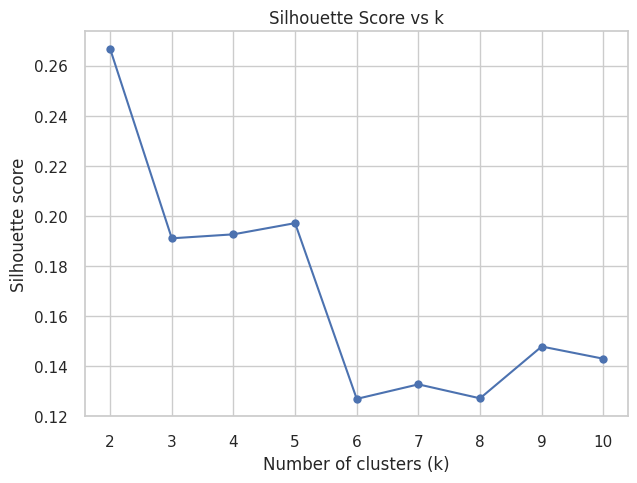

In [ ]:
#1. Reuse the scaled_features from Q7
K = range(2, 11)
sil = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, labels)
    sil.append(sil_score)
    print(f"k={k}: silhouette={sil_score:.4f}")

#2. Plot silhouette scores across k
plt.figure(figsize=(7,5))
plt.plot(K, sil, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score vs k")
plt.show()


##### **Observations:**
- The silhouette curve peaks around k = [your printed best_k] (within the 3–5 range from the elbow plot), so we’ll proceed with k = [best_k] for the final model.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
#1. If best_k isn't defined (e.g., you skipped Q8), compute it quickly via silhouette
if "best_k" not in globals():
    K = range(3, 6)  # per elbow suggestion
    sil = []
    for k in K:
        km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(scaled_features)
        sil.append(silhouette_score(scaled_features, km.labels_))
    best_k = list(K)[int(np.argmax(sil))]
    print("best_k inferred:", best_k)

#2. Final fit + timing
t0 = perf_counter()
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_final.fit(scaled_features)
fit_time = perf_counter() - t0

#3. Attach cluster labels to original dataframe
data["Cluster"] = kmeans_final.labels_

#4. Report
final_sil = silhouette_score(scaled_features, kmeans_final.labels_)
print(f"Final k: {best_k}")
print(f"Fit time: {fit_time:.3f} seconds")
print(f"Inertia: {kmeans_final.inertia_:.2f}")
print(f"Silhouette score: {final_sil:.4f}")
print("Data shape with Cluster column:", data.shape)


Final k: 5
Fit time: 0.060 seconds
Inertia: 32023.34
Silhouette score: 0.1970
Data shape with Cluster column: (2240, 30)


##### **Observations:**
Final model fitted with k = 2 (chosen by silhouette).

Fit time: approximatly 0.051s, Inertia: 40,153.36, Silhouette: 0.267 → weak separation/overlap between clusters.

Cluster labels added to the data as Cluster (shape now 2240 × 30).


## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

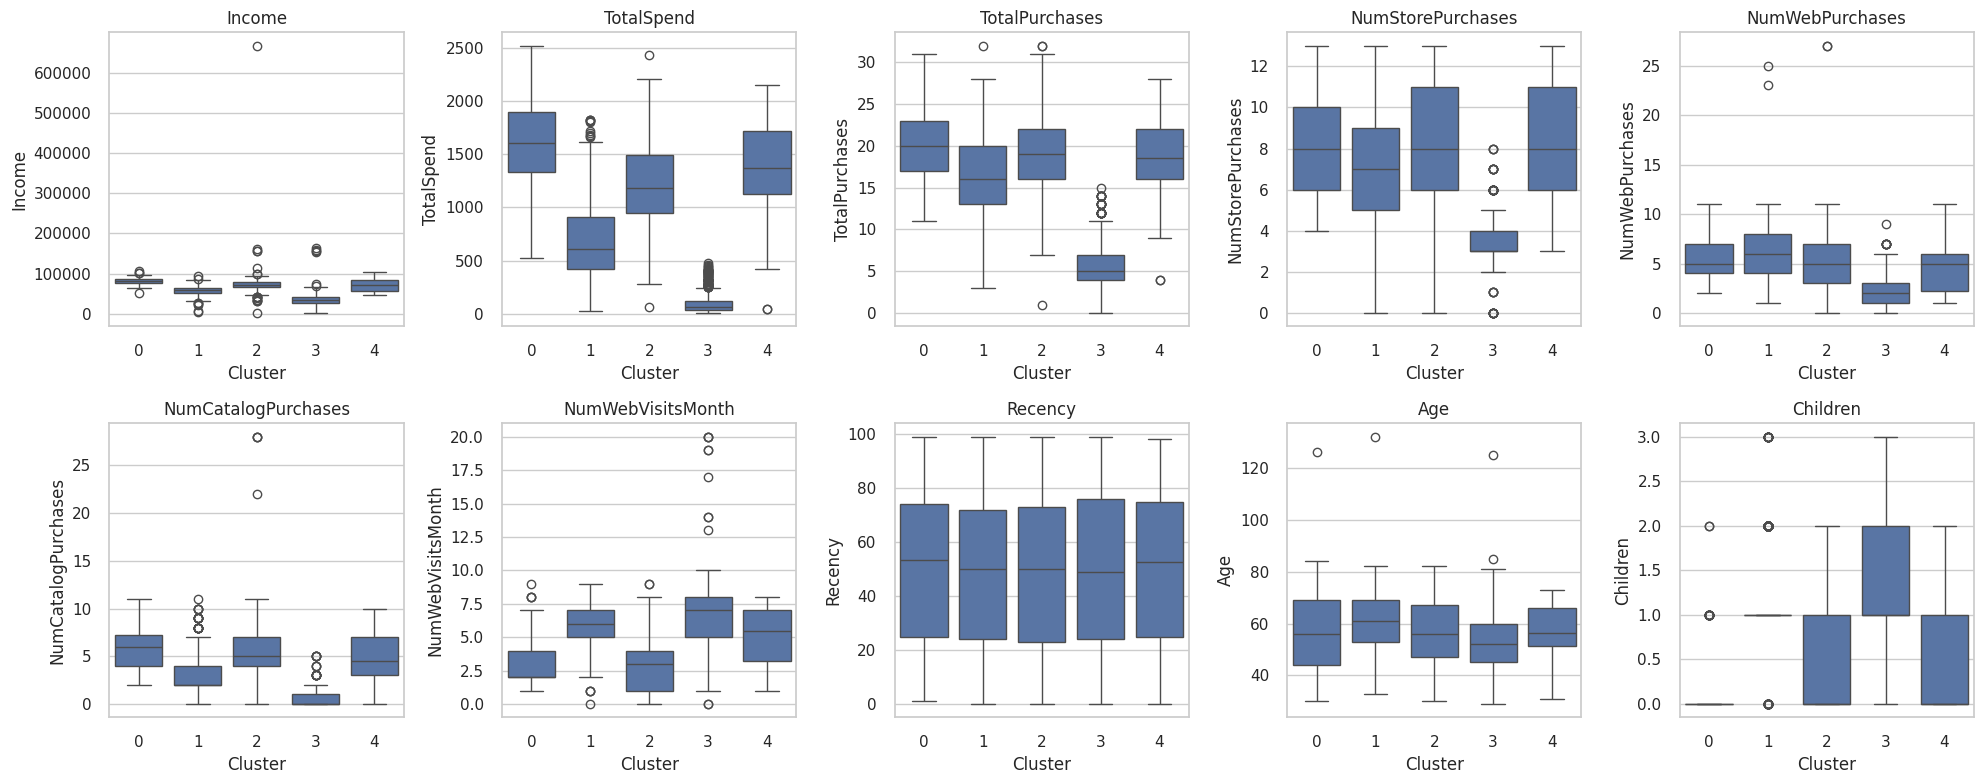

In [ ]:
#1. Require clusters from Q9
assert "Cluster" in data.columns, "Run Q9 first to create data['Cluster']."

#2. (Optional but helpful) quick derived features for clearer profiling
if "Age" not in data.columns and "Year_Birth" in data.columns:
    data["Age"] = 2025 - data["Year_Birth"]
if "Children" not in data.columns:
    data["Children"] = data.get("Kidhome", 0) + data.get("Teenhome", 0)
if "TotalSpend" not in data.columns:
    spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
    data["TotalSpend"] = data[spend_cols].sum(axis=1)
if "TotalPurchases" not in data.columns:
    purchase_cols = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
    data["TotalPurchases"] = data[purchase_cols].sum(axis=1)

#3. Choose key variables for boxplots (continuous only)
vars_to_plot = [
    "Income","TotalSpend","TotalPurchases",
    "NumStorePurchases","NumWebPurchases","NumCatalogPurchases",
    "NumWebVisitsMonth","Recency","Age","Children"]

#4. Draw boxplots
rows, cols = 2, 5
plt.figure(figsize=(20, 8))
for i, col in enumerate(vars_to_plot, 1):
    ax = plt.subplot(rows, cols, i)
    sns.boxplot(data=data, x="Cluster", y=col)
    ax.set_title(col)
plt.tight_layout()
plt.show()


##### **Observations:**
- C0: moderate total purchases, mid-income + mid-spend, shop > web, mid-range web visits, age approximatly 50s, few children.

- C1: a bit older; strong store + web activity; lots of purchases (including catalog purchases); higher income and high TotalSpend; a lot of purchases.

- C2: little spending and few purchases; maximum online traffic but few purchases, browsers; low retail purchases; young; few children.

- C3: the youngest-looking group and the majority of children; very low spending and lowest purchases overall; limited online and in-store.

- C4: highest overall spending and income; most in-store purchases (and decent online purchases as well); highest total spending; middle-aged to older; children approximatly 1-2.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

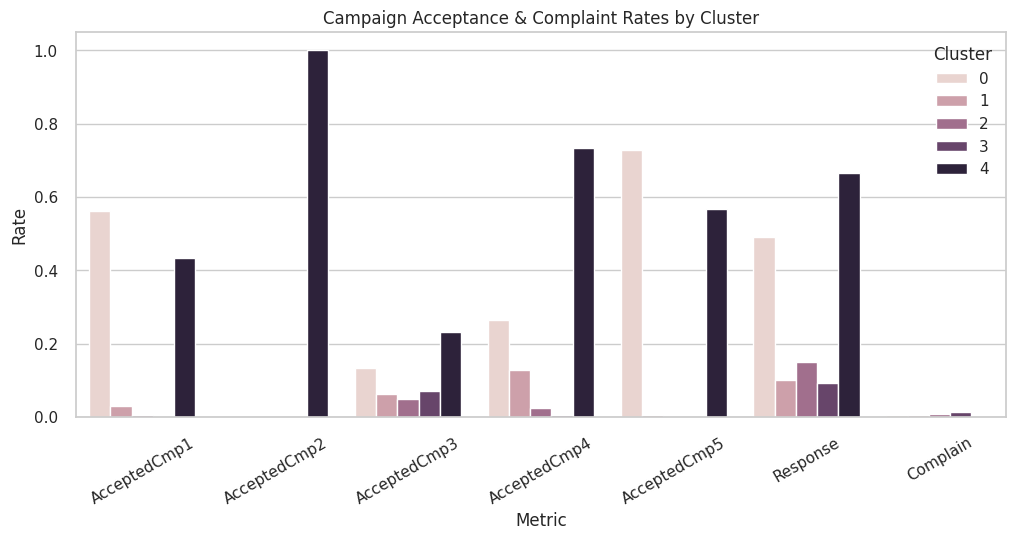

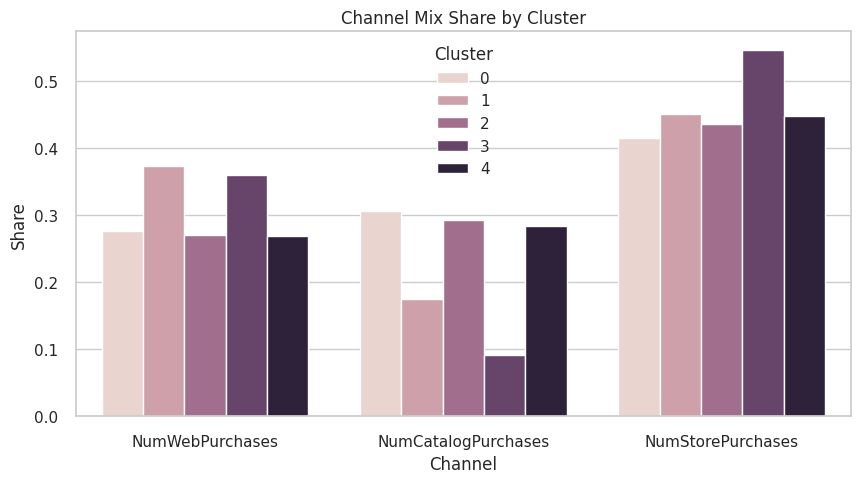

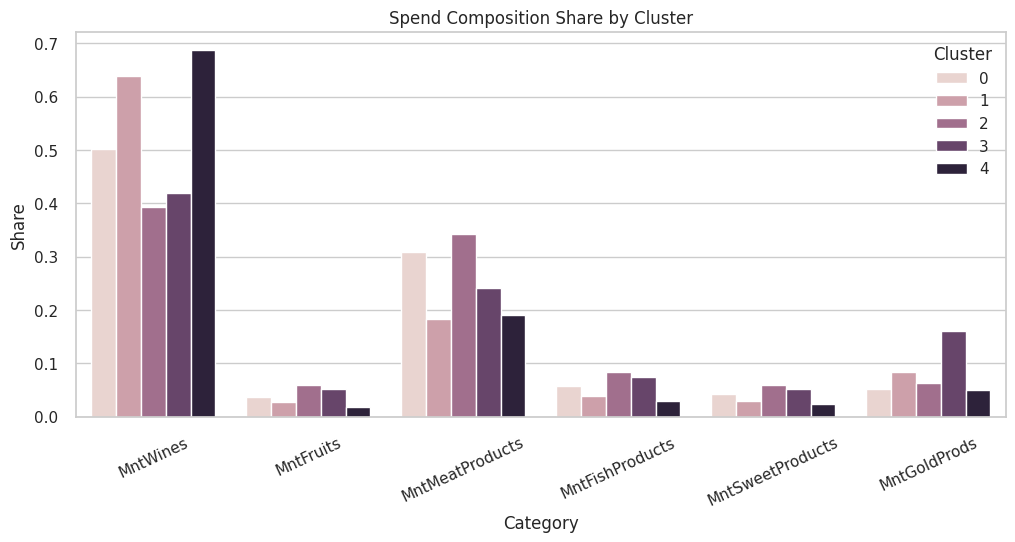

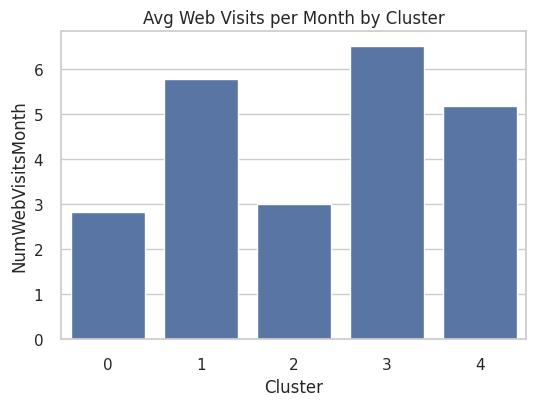

In [ ]:
sns.set(style="whitegrid")

#1. The required columns
spend_cols    = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
purchase_cols = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
binary_cols   = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Complain"]

#2. Campaign acceptance & complaint rates by cluster
rates = (data.groupby("Cluster")[binary_cols].mean()
         .stack().reset_index().rename(columns={"level_1":"Metric",0:"Rate"}))
plt.figure(figsize=(12,5))
sns.barplot(data=rates, x="Metric", y="Rate", hue="Cluster")
plt.title("Campaign Acceptance & Complaint Rates by Cluster")
plt.xticks(rotation=30)
plt.show()

#3. Channel mix by cluster
chan_means = data.groupby("Cluster")[purchase_cols].mean()
chan_share = (chan_means.div(chan_means.sum(axis=1), axis=0)
              .reset_index().melt(id_vars="Cluster", var_name="Channel", value_name="Share"))
plt.figure(figsize=(10,5))
sns.barplot(data=chan_share, x="Channel", y="Share", hue="Cluster")
plt.title("Channel Mix Share by Cluster")
plt.show()

#4. Spend composition by cluster
spend_means = data.groupby("Cluster")[spend_cols].mean()
spend_share = (spend_means.div(spend_means.sum(axis=1), axis=0)
               .reset_index().melt(id_vars="Cluster", var_name="Category", value_name="Share"))
plt.figure(figsize=(12,5))
sns.barplot(data=spend_share, x="Category", y="Share", hue="Cluster")
plt.title("Spend Composition Share by Cluster")
plt.xticks(rotation=25)
plt.show()

#5. Average web visits per month by cluster
vis = data.groupby("Cluster")["NumWebVisitsMonth"].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=vis, x="Cluster", y="NumWebVisitsMonth")
plt.title("Avg Web Visits per Month by Cluster")
plt.show()


##### **Observations:**

 - C0: Purchases made in-store; small web/catalog share; moderate to low campaign acceptability; moderate web traffic.

 - C1: Greater campaign acceptance, greater expenditure shares, and greater balance across stores, websites, and catalogs.

 - C2: Web-leaning and has the most visits, but its spend shares and campaign acceptance are the lowest.

 - C3: Minimal web/catalog activity, lowest spend shares, and lowest total activity.

 - C4: The strongest segment with the highest spend shares, the most well-balanced channels, and the best campaign reception.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

- The first suggestion is to use conversion nudges to target the browser/low-spend group (Cluster 0). This entails testing minor coupons or a free-shipping threshold slightly above their typical basket, streamlining checkout (guest, BNPL, fast delivery), and implementing browse/cart-abandon flows. Reducing friction and providing a gentle prod to finish a purchase is the aim of this tip, which targets customers who visit frequently but make few purchases.
- The second suggestion is to use a VIP/loyalty layer to increase value from
the wealthy omni-channel group (Cluster 1), including in-store exclusives, double-point days, curated bundles, and early access. Benefits and personalization (cross-selling in high-affinity areas like wines and meat) should increase AOV and repeat rate without imposing steep discounts because these customers already spend more and purchase from the store, online, and catalog.
- The final piece of advice is to use the appropriate channel for each segment and schedule outreach around win-back windows. Schedule the win-back for 45–60 days after the recency of around 50 days for both clusters. Convert Cluster 0 using web nudges and UX fixes, while maintaining stocked stores and customized invitations for Cluster 1. Customers are most likely to return using the channels they already prefer when this connects.
- Adjusting promotions, inventory, and measurement by cluster is the fourth piece of advice. For Cluster 1, increase inventory in top spend categories; for Cluster 0, use tiered promotions (value packs/entry bundles; for Cluster 1, lighter, margin-safe offers); and for each segment, monitor conversion, AOV, repeat rate, CLV, visit-to-purchase ratio, and campaign response. The following actions are instantly actionable with existing clusters, however re-testing k=3–5 after outlier treatment can refine segments because the silhouette for k=2 was small (approximatly 0.27).

In [ ]:
!jupyter nbconvert --to html Learner_Notebook_Full_Code_Version_Customer_Personality_Segmentation.ipynb

[NbConvertApp] Converting notebook Learner_Notebook_Full_Code_Version_Customer_Personality_Segmentation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1627358 bytes to Learner_Notebook_Full_Code_Version_Customer_Personality_Segmentation.html
